# Covid19 - Brazil delay related to the number of announced deaths
- by Marcelo Rovai
- 09 June 2020
- Based on the tutorial [COMO FAZER GRÁFICOS COM SEABORN](https://www.youtube.com/watch?v=INsCQC0Cmjs&t=11s) by Peixe Babel

## Main Libraries and setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.animation as animation
import seaborn as sns
# from IPython.display import HTML

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.float_format', lambda x: '%.f' % x)
pd.options.display.float_format = '{:,}'.format
mpl.rcParams['figure.dpi'] = 150
plt.style.use('seaborn-paper')
plt.rcParams["animation.html"] = "jshtml"

## Datasets

[Repositório do site Observatório Covid-19 BR](https://github.com/covid19br/covid19br.github.io)

https://covid19br.github.io/analises.html?aba=aba2

**Correction in the delay related to the number of announced deaths**<br>
The number of deaths reported by the Ministry of Health in its epidemiological bulletins does not reflect the current deaths by Covid-19. To give a more realistic picture of the current situation, we apply a statistical technique that, through the delays between death and notification, estimates how many deaths have already occurred but are not yet included in the notification system. This estimate is what we call nowcasting and gives us a more realistic view of today. We estimate that at the lower limit we have **1.67** more deaths for each reported death and at the upper limit we estimate that there are **2.72** unreported deaths for each death already reported.

In [6]:
url = 'https://raw.githubusercontent.com/covid19br/covid19br.github.io/master/dados/SRAGs-tabela-last-updated_revised2.csv'

In [7]:
df = pd.read_csv(url, error_bad_lines=False)
df.shape

(55, 26)

In [8]:
df.head()

Data  08/05/20  07/05/20  03/05/20  02/05/20  29/04/20  27/04/20  \
0  15/03/2020         1       1.0       1.0       1.0       1.0       1.0   
1  16/03/2020         3       3.0       3.0       3.0       3.0       3.0   
2  17/03/2020         3       3.0       3.0       3.0       3.0       3.0   
3  18/03/2020         6       6.0       5.0       5.0       5.0       5.0   
4  19/03/2020         7       7.0       7.0       7.0       7.0       7.0   

   23/04/20  22/04/20  20/04/20  ...  11/04/20  10/04/20  08/04/20  07/04/20  \
0       1.0       1.0       1.0  ...       1.0       1.0       1.0       1.0   
1       3.0       3.0       3.0  ...       3.0       3.0       3.0       3.0   
2       3.0       3.0       3.0  ...       2.0       2.0       2.0       2.0   
3       5.0       5.0       5.0  ...       5.0       5.0       4.0       4.0   
4       7.0       7.0       7.0  ...       7.0       7.0       7.0       7.0   

   06/04/20  05/04/20  04/04/20  02/04/20  30/03/20  29/03/20  
0       1.0       1.0       1.0       1.0       nan       nan  
1       3.0       3.0       3.0       2.0       2.0       2.0  
2       2.0       2.0       2.0       2.0       2.0       2.0  
3       4.0       4.0       4.0       4.0       4.0       4.0  
4       7.0       7.0       7.0       7.0       6.0       6.0  

[5 rows x 26 columns]

In [9]:
datas = df['Data']
datas = ['/'.join(d.split('/')[::-1]) for d in datas]
df['Data'] = np.asarray(datas)
df.drop(0, inplace=True)

In [10]:
total_20_04 = df['20/04/20'].sum()
total_27_04 = df['27/04/20'].sum()
total_08_05 = df['08/04/20'].sum()
print('total_20_04: ', total_20_04)
print('total_27_04: ', total_27_04)
print('total_08_05: ', total_08_05)

total_20_04:  2064.0
total_27_04:  3586.0
total_08_05:  649.0


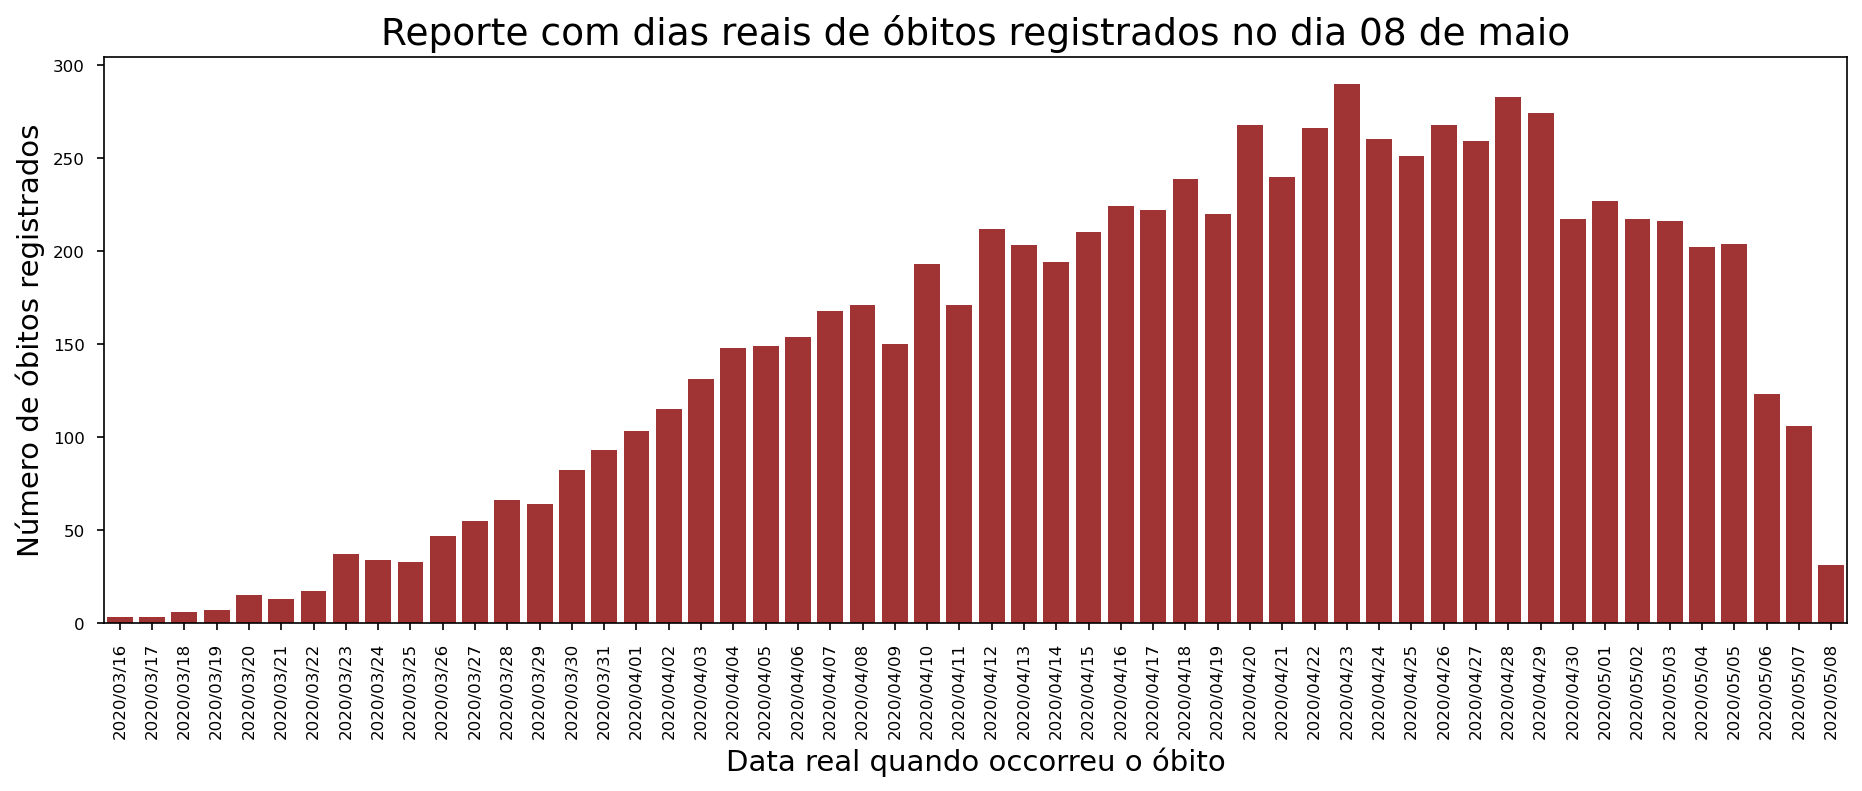

In [16]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x='Data', y='08/05/20', color='firebrick')
plt.xticks(rotation=90)
plt.title('Reporte com dias reais de óbitos registrados no dia 08 de maio', fontsize=18)
plt.xlabel('Data real quando occorreu o óbito', fontsize=14)
plt.ylabel('Número de óbitos registrados', fontsize=14);

Number of deaths by COVID by date in Brazil, reported in epidemiological bulletins from the Ministry of Health. Each line shows the number of deaths reported up to the respective bulletin. Even bulletins for much later dates increase the number of deaths on earlier dates. The curve falls for dates close to the day of the bulletin because there are few deaths that are notified and confirmed close to their date of occurrence - effect of delay in notification. In the following bulletins these are the dates for which more deaths are added, in general.

In [12]:
dados = df[['Data', '08/05/20', '27/04/20', '20/04/20']]

In [13]:
dados.head()

Data  08/05/20  27/04/20  20/04/20
1  2020/03/16         3       3.0       3.0
2  2020/03/17         3       3.0       3.0
3  2020/03/18         6       5.0       5.0
4  2020/03/19         7       7.0       7.0
5  2020/03/20        15      13.0      11.0

In [14]:
dados = dados.melt('Data', var_name='Reporte',value_name='Obitos')
dados

Data   Reporte  Obitos
0    2020/03/16  08/05/20     3.0
1    2020/03/17  08/05/20     3.0
2    2020/03/18  08/05/20     6.0
3    2020/03/19  08/05/20     7.0
4    2020/03/20  08/05/20    15.0
..          ...       ...     ...
157  2020/05/04  20/04/20     nan
158  2020/05/05  20/04/20     nan
159  2020/05/06  20/04/20     nan
160  2020/05/07  20/04/20     nan
161  2020/05/08  20/04/20     nan

[162 rows x 3 columns]

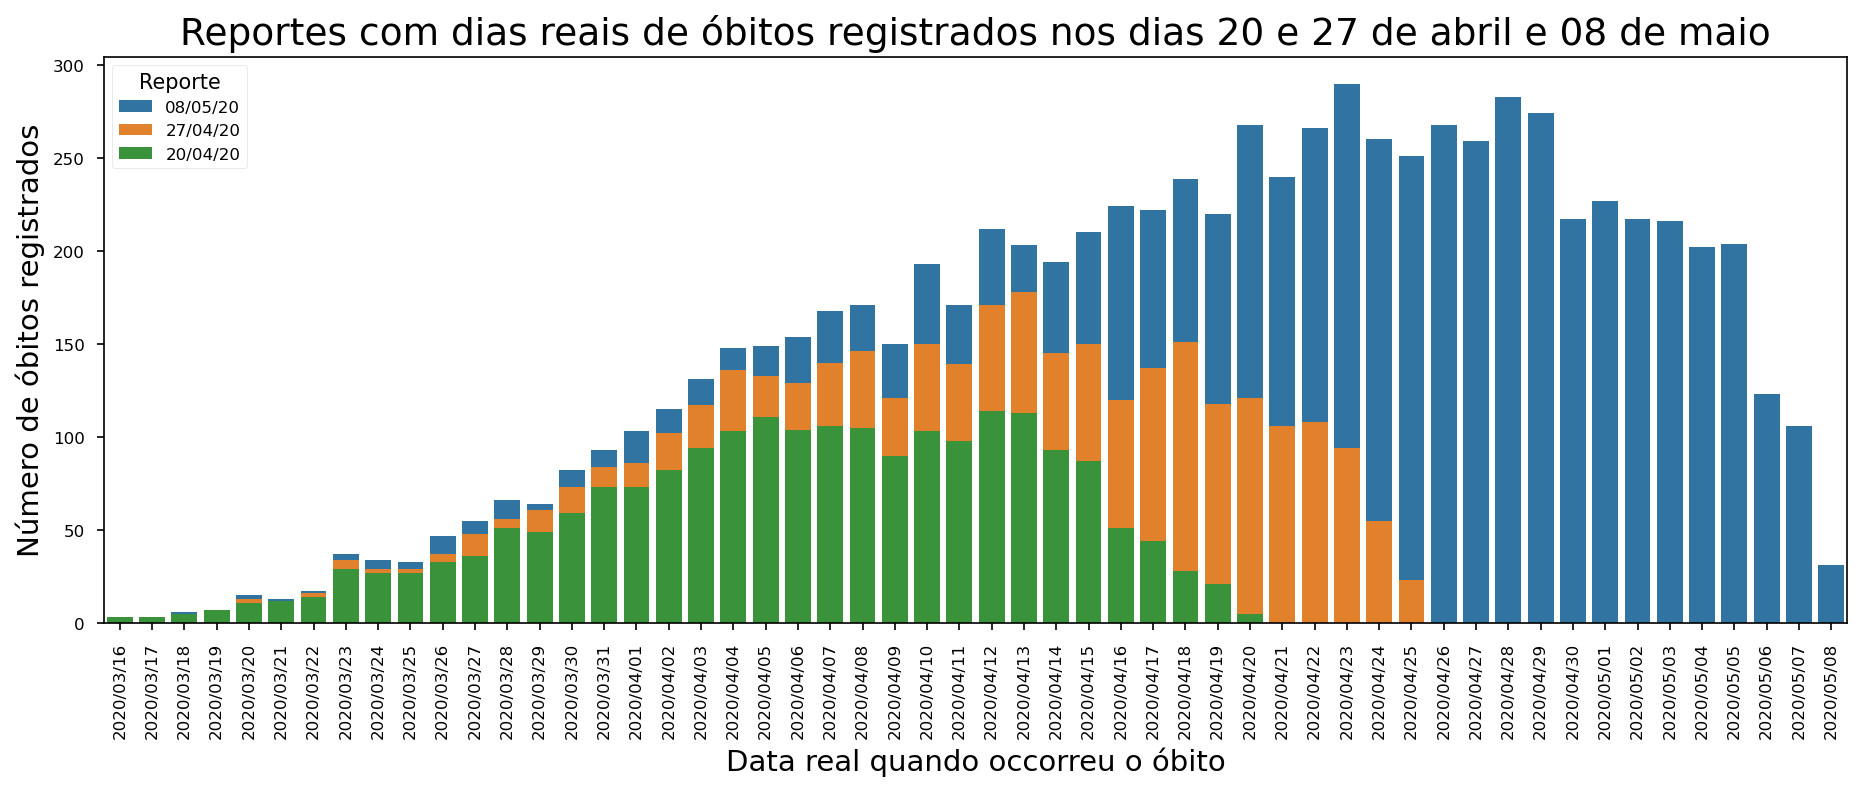

In [17]:
plt.figure(figsize=(15, 5))
sns.barplot(data=dados, x='Data', y='Obitos', hue='Reporte', dodge=False)
plt.xticks(rotation=90)
plt.title('Reportes com dias reais de óbitos registrados nos dias 20 e 27 de abril e 08 de maio', fontsize=18)
plt.xlabel('Data real quando occorreu o óbito', fontsize=14)
plt.ylabel('Número de óbitos registrados', fontsize=14);

In [18]:
def plot_obitos(idx):
    colunas = df.columns[::-1]
    dados = pd.DataFrame(df[colunas[:idx]])
    dados['Data'] = df['Data']
    
#     # Plot do passado
#     dados = dados.melt('Data', var_name='Reporte',value_name='Obitos')
#     sns.lineplot(ax=ax, data=dados, x='Data', y='Obitos', color='gray', legend=False)

    # Plot do presente
    sns.lineplot(ax=ax, data=df, x='Data', y=df[colunas[idx]], color='r', legend=False)
    
    ax.set_title('Reporte de {0}'.format(colunas[idx]), fontsize=18)
    ax.set_ylabel('Óbitos por data do Óbito', fontsize=14)

In [20]:
%%capture
plt.close('all')
fig, ax = plt.subplots(figsize=(14,8))
plt.ylim(0, 300)
plt.xlim(0,54)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)

anim = animation.FuncAnimation(fig, plot_obitos, frames=25, interval=1000, blit=False)

In [21]:
anim

In [57]:
# anim.save('video.mp4') Saving is not working on this version of Matplotlib 

NOTA Observatório Covid-19 ==> 61% dos óbitos só são confirmados 10 dias depois da ocorrência.